<a href="https://colab.research.google.com/github/JaLMaDI/stock_price_prediction/blob/master/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework, we presente 3 methods of stock price prediction:

1.   Ridge Regression.
2.   Gradient Boosting Regressors.
3.   Linear regression (Ordinary Least Squares)

We used .csv file as dataset for Facebook stock price.

In [0]:
#Import all librairies needed.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler


In [29]:
df = pd.read_csv('Facebook.csv')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,126.669998,129.940002,126.470001,129.729996,129.729996,26278400
2016-09-07,130.039993,131.979996,129.949997,131.050003,131.050003,27990800
2016-09-08,130.919998,131.080002,129.809998,130.270004,130.270004,15676600
2016-09-09,129.710007,129.949997,127.099998,127.099998,127.099998,27100700
2016-09-12,125.959999,128.759995,125.750000,128.690002,128.690002,21252800


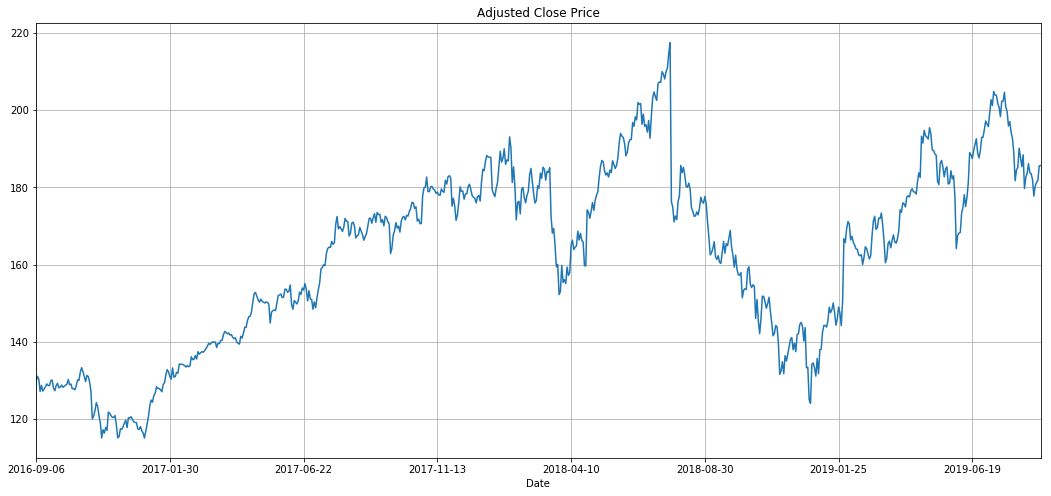

In [30]:
df['Adj Close'].plot(label='FACEBOOK', figsize=(18,8), title='Adjusted Close Price', grid=True) 

In [0]:
window_size = 32

num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [0]:
data = df['Adj Close'].values[indices]

In [0]:
X = data[:,:-1]
y = data[:,-1]

In [0]:
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)

X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]


Method #1: Ridge Regression

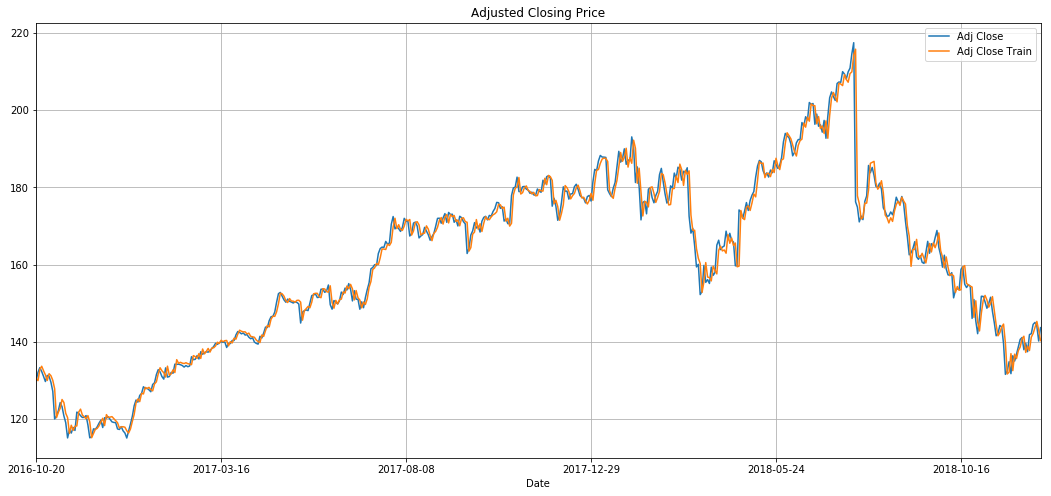

In [35]:
#1) Train
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

#2) Infer
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

#3) Plot the result
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:ind_split]
df_ridge['Adj Close Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label='Facebook', figsize=(18,8), title='Adjusted Closing Price', grid=True)



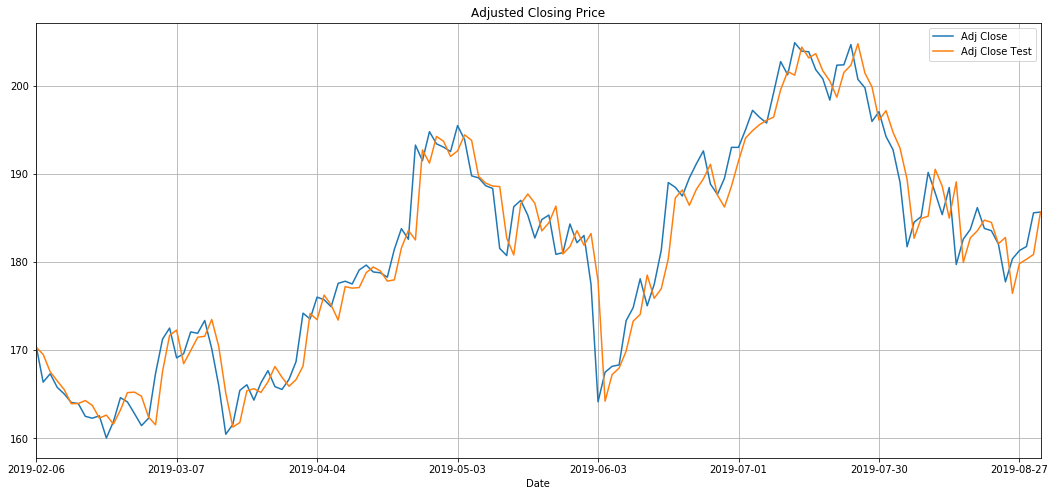

In [36]:
#4) Testing
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window_size:]
df_ridge['Adj Close Test'] = y_pred_ridge
df_ridge.plot(label='Facebook', figsize=(18,8), title='Adjusted Closing Price', grid=True)

Method #2 Gradient Boosting Trees

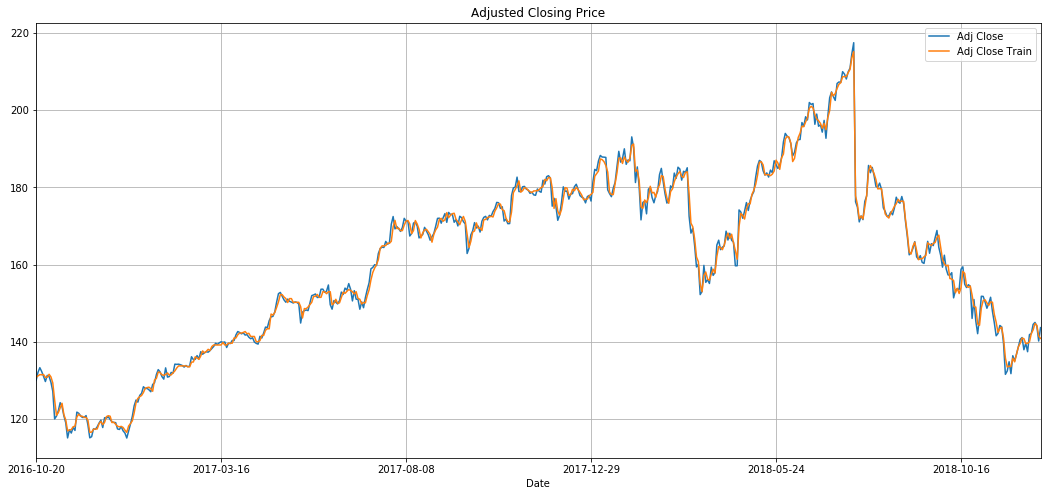

In [37]:
#1) Train
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

#2) Infer
y_pred_train_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

#3) PLot results
df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[window_size:ind_split]
df_gb['Adj Close Train'] = y_pred_train_gb[:-window_size]
df_gb.plot(label='Facebook', figsize=(18, 8), title='Adjusted Closing Price', grid=True)

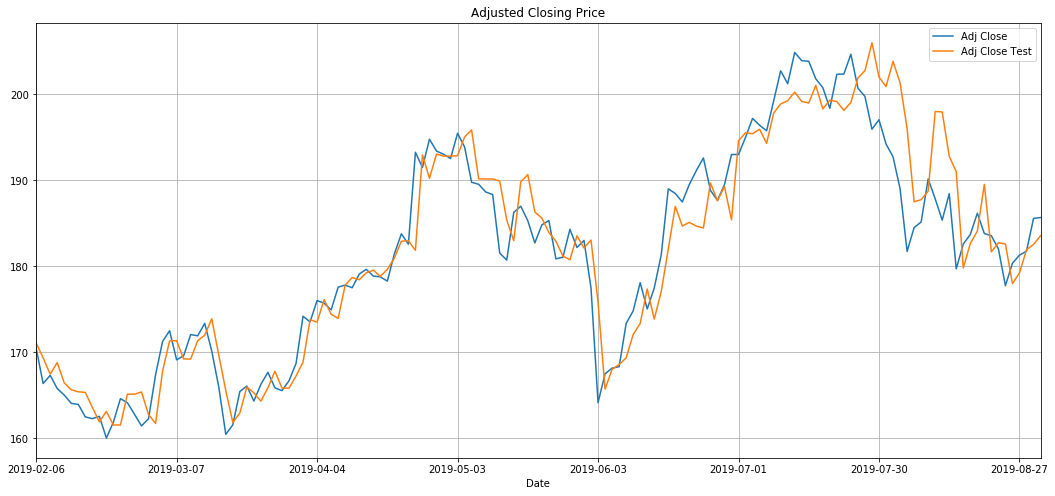

In [38]:
#4) Testing
df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[ind_split+window_size:]
df_gb['Adj Close Test'] = y_pred_gb
df_gb.plot(label='Facebook', figsize=(18,8), title='Adjusted Closing Price', grid=True)



Method #3: Linear Regression

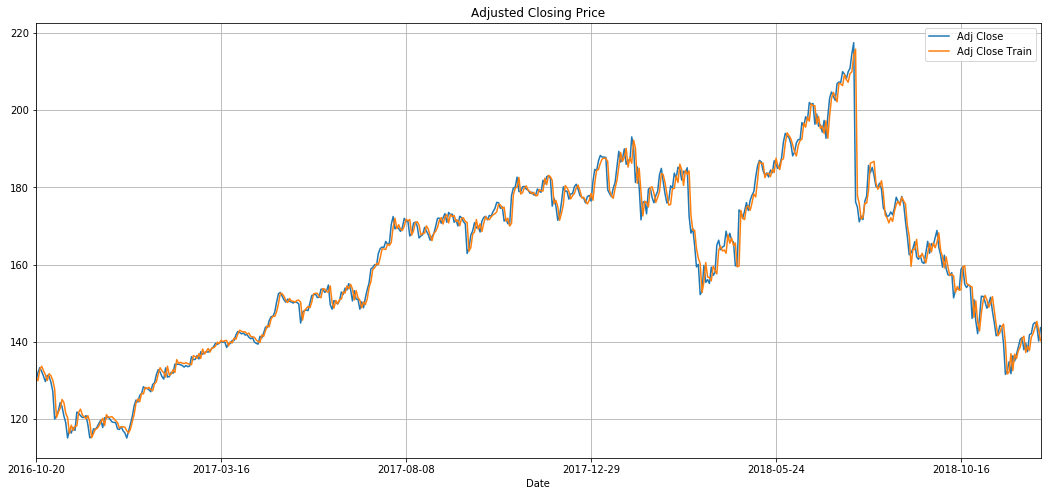

In [39]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#2) Infer
y_pred_train_linear = linear_model.predict(X_train)
y_pred_linear = linear_model.predict(X_test)

#3) Plot the result
df_linear = df.copy()
df_linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_linear = df_linear.iloc[window_size:ind_split]
df_linear['Adj Close Train'] = y_pred_train_linear[:-window_size]
df_linear.plot(label='Facebook', figsize=(18,8), title='Adjusted Closing Price', grid=True)


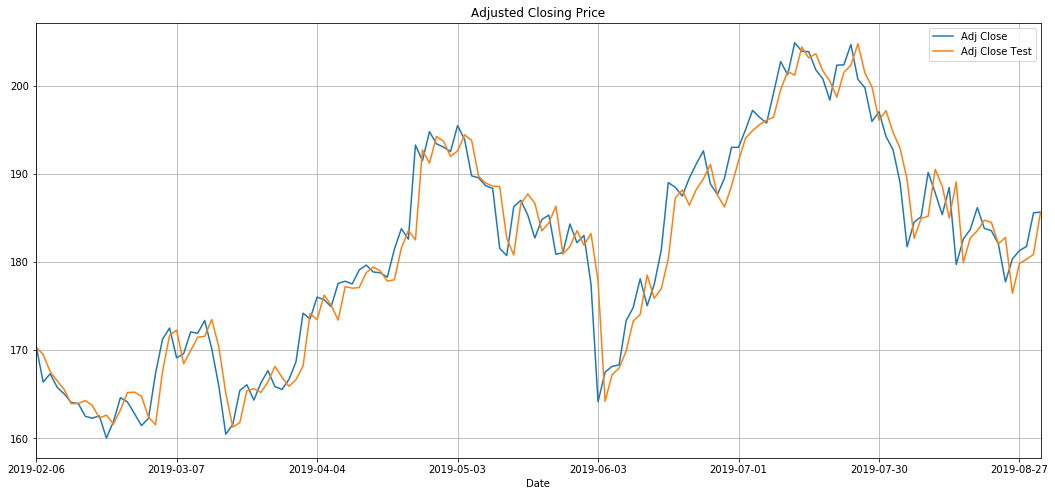

In [40]:
#4) Testing
df_linear = df.copy()
df_linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_linear = df_linear.iloc[ind_split+window_size:]
df_linear['Adj Close Test'] = y_pred_linear
df_linear.plot(label='Facebook', figsize=(18,8), title='Adjusted Closing Price', grid=True)



In [0]:
from google.colab import drive
drive.mount('/content/drive')